In [1]:
import math
from matplotlib import pyplot as plt
import pandas as pd
from pandas import read_csv
from pandas import set_option
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

#import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
#necessita do pydot pip install pydot
from keras.utils.vis_utils import plot_model


In [2]:
# Load dataset
filename = ("https://telescopeinstorage.blob.core.windows.net/datasets/housing.csv")
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=names,engine='python')


In [3]:
#- CRIM     per capita crime rate by town
#- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#- INDUS    proportion of non-retail business acres per town
#- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#- NOX      nitric oxides concentration (parts per 10 million)
#- RM       average number of rooms per dwelling -  é o número médio de cômodos entre os imóveis na vizinhança.
#- AGE      proportion of owner-occupied units built prior to 1940
#- DIS      weighted distances to five Boston employment centres
#- RAD      index of accessibility to radial highways
#- TAX      full-value property-tax rate per $10,000
#- PTRATIO  pupil-teacher ratio by town - é a razão de estudantes para professores nas escolas de ensino fundamental e médio na vizinhança.
#- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#- LSTAT    % lower status of the population - é a porcentagem de proprietários na vizinhança considerados de "classe baixa" (proletariado).
#- MEDV     Median value of owner-occupied homes in $1000's

dataset.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


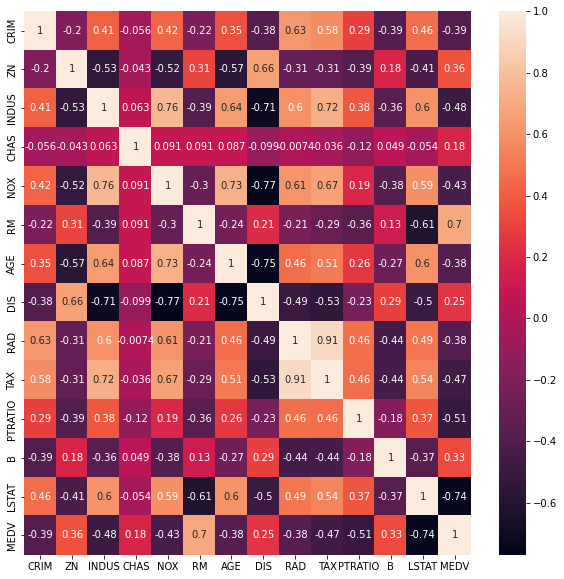

In [4]:
corr = dataset.corr(method='pearson')
plt.figure(figsize=(10, 10))
sb.heatmap(corr, annot = True)

In [5]:
prices = dataset['MEDV']
# Exclusão das caracteristicas com alta correlação
dataset = dataset.drop(['INDUS','NOX','AGE','RAD'], axis = 1)
features = dataset.drop('MEDV', axis = 1)
dataset.head()

,CRIM,ZN,CHAS,RM,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,0,6.575,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,0,6.421,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,0,7.185,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,0,6.998,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,0,7.147,6.0622,222.0,18.7,396.90,5.33,36.2


In [6]:
features.head()

,CRIM,ZN,CHAS,RM,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0,6.575,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,0,6.421,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,0,7.185,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,0,6.998,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,0,7.147,6.0622,222.0,18.7,396.90,5.33


In [7]:
prices.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [8]:
# Split-out validation dataset
seed = 7
test_size = 0.30

X = features.values
y = prices.values

In [9]:
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [10]:
qtd_features = len(X[0,:])
qtd_features

9

In [11]:
qtd_amostras = len(X[:,0])
qtd_amostras

506

In [12]:
X_train.shape

(354, 9)

In [14]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [25]:
model = Sequential()
model.add(Dense(12, input_dim=qtd_features, activation='relu'))
model.add(Dense(12, activation='relu'))
#Adiciona uma camada de saída sem função de ativação fazendo a apenas a multiplicação das caracteristicas x pesos
model.add(Dense(1))

In [26]:
# Usa a função de perda mse (mean square error) e monitora o mae (mean absolute erro) e mse (mean square error)
model.compile(loss='mse',optimizer='adam', metrics=['mae', 'mse'])

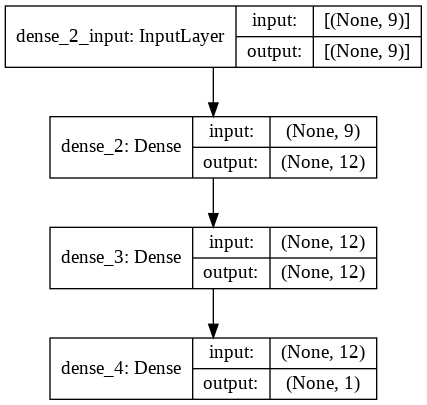

In [27]:
plot_model(model, to_file='mlp-seq.png', show_shapes=True, show_layer_names=True)

In [28]:
model.fit(X_train, y_train, epochs=100, batch_size=4)

Epoch 1/100
89/89 [==============================] - 1s 1ms/step - loss: 571.5571 - mae: 21.9524 - mse: 571.5571
Epoch 2/100
89/89 [==============================] - 0s 1ms/step - loss: 402.5567 - mae: 17.6082 - mse: 402.5567
Epoch 3/100
89/89 [==============================] - 0s 2ms/step - loss: 159.7270 - mae: 9.3997 - mse: 159.7270
Epoch 4/100
89/89 [==============================] - 0s 1ms/step - loss: 103.8979 - mae: 7.4098 - mse: 103.8979
Epoch 5/100
89/89 [==============================] - 0s 1ms/step - loss: 89.2829 - mae: 6.7650 - mse: 89.2829
Epoch 6/100
89/89 [==============================] - 0s 1ms/step - loss: 78.1014 - mae: 6.3448 - mse: 78.1014
Epoch 7/100
89/89 [==============================] - 0s 1ms/step - loss: 68.3866 - mae: 5.9106 - mse: 68.3866
Epoch 8/100
89/89 [==============================] - 0s 1ms/step - loss: 59.9221 - mae: 5.5163 - mse: 59.9221
Epoch 9/100
89/89 [==============================] - 0s 2ms/step - loss: 53.5947 - mae: 5.0965 - mse: 53.5947


In [ ]:
X_test

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [30]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

2.8701928050894487
23.976207251351507
4.896550546185703


In [31]:
dfresult = pd.DataFrame({
        "Preço Original": y_test,
        "Preço Predito": y_pred[:,0]
    })

In [32]:
dfresult.head(20)

,Preço Original,Preço Predito
0,21.7,22.843872
1,18.5,20.263573
2,22.2,20.146681
3,20.4,20.865501
4,8.8,6.084579
5,8.3,11.002548
6,21.4,18.825724
7,23.6,26.892830
8,23.5,27.872389
9,19.0,13.029754


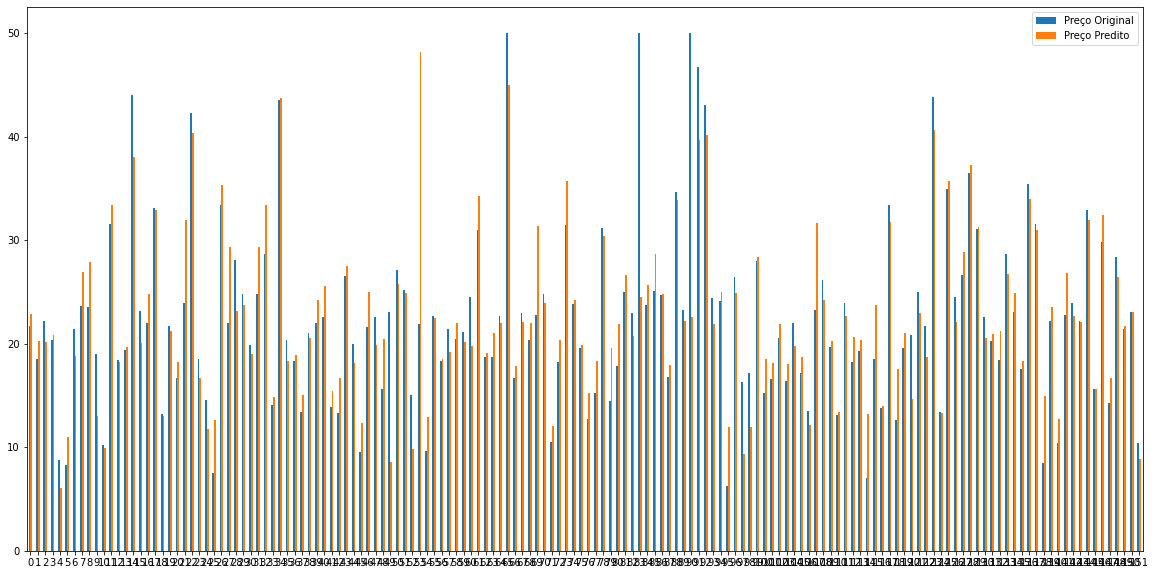

In [33]:

dfresult.plot.bar(rot=0, figsize = (20,10))